<a href="https://colab.research.google.com/github/Dih08/Dih08/blob/main/ModeloMentorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear

# Importando os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando os dados

In [2]:
df = pd.read_csv('dataset_modulo_8[1].csv')
df.head()


,Unnamed: 0,Anos de Estudo,Salário
0,0,2.0,1559.0
1,1,4.0,3312.0
2,2,6.0,2078.0
3,3,7.0,3758.0
4,4,9.0,11724.0


In [3]:
df = df.drop('Unnamed: 0',axis =1)
df.head()

,Anos de Estudo,Salário
0,2.0,1559.0
1,4.0,3312.0
2,6.0,2078.0
3,7.0,3758.0
4,9.0,11724.0


In [4]:
df.shape

(20, 2)

# Agora vamos prever os salarios a pertir do tempo de estudo

## plot da dispersão entre as variaveis

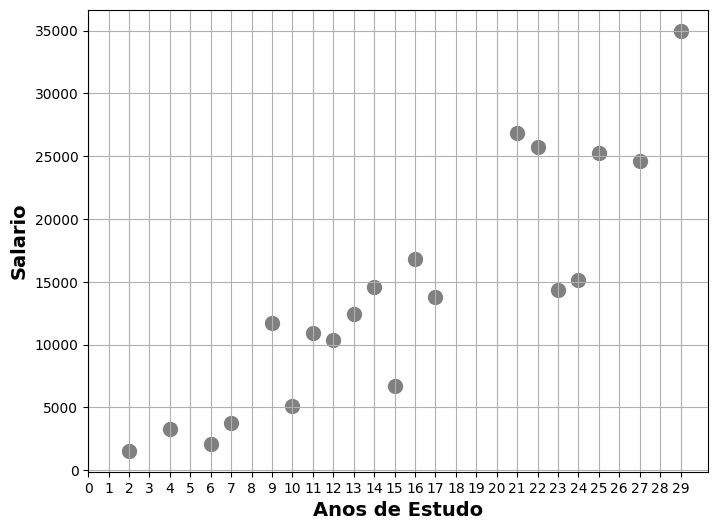

In [5]:
plt.figure(figsize=[8,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel('Anos de Estudo', fontweight = 'bold', fontsize = 14)
plt.ylabel('Salario', fontweight = 'bold', fontsize = 14)
plt.xticks(range(0, 30))
plt.grid()
plt.show()

### Salario = O° + O¹ xAnos de estudo

In [6]:
def f_linear(x, theta0, theta1):
  pred = theta0 + theta1 * x
  pred.name = None
  return pred

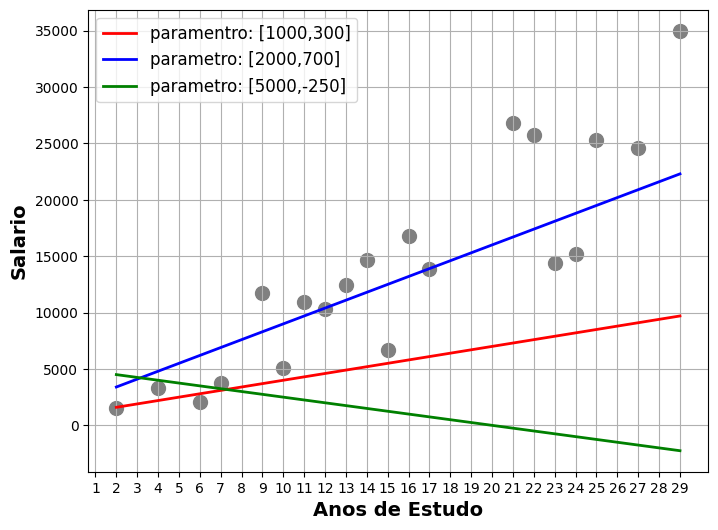

In [7]:
X = df['Anos de Estudo']
y1 = f_linear(X, theta0 = 1000, theta1 = 300)
y2 = f_linear(X, theta0 = 2000,theta1 = 700)
y3 = f_linear(X, theta0 = 5000, theta1=-250)

plt.figure(figsize=[8,6])
plt.scatter(df['Anos de Estudo'], df['Salário'], s = 100, c = 'gray')
plt.xlabel('Anos de Estudo', fontweight = 'bold', fontsize = 14)
plt.ylabel('Salario', fontweight = 'bold', fontsize = 14)
plt.xticks(range(0, 30))
plt.grid()

plt.plot(X, y1, label = 'paramentro: [1000,300]', lw = 2, c='red')
plt.plot(X, y2, label = 'parametro: [2000,700]',lw = 2, c= 'blue')
plt.plot(X, y3, label = 'parametro: [5000,-250]',lw = 2 ,c= 'green')
plt.legend(fontsize = 12)
plt.show()

In [8]:
X = df['Anos de Estudo']
X

0      2.0
1      4.0
2      6.0
3      7.0
4      9.0
5     10.0
6     11.0
7     12.0
8     13.0
9     14.0
10    15.0
11    16.0
12    17.0
13    21.0
14    22.0
15    23.0
16    24.0
17    25.0
18    27.0
19    29.0
Name: Anos de Estudo, dtype: float64

In [9]:
y = df['Salário']
y

0      1559.0
1      3312.0
2      2078.0
3      3758.0
4     11724.0
5      5128.0
6     10965.0
7     10354.0
8     12457.0
9     14621.0
10     6711.0
11    16826.0
12    13827.0
13    26841.0
14    25739.0
15    14385.0
16    15156.0
17    25268.0
18    24623.0
19    34995.0
Name: Salário, dtype: float64

In [11]:
y_pred = f_linear(X, theta0 = 2000, theta1= 300)
y_pred

0      2600.0
1      3200.0
2      3800.0
3      4100.0
4      4700.0
5      5000.0
6      5300.0
7      5600.0
8      5900.0
9      6200.0
10     6500.0
11     6800.0
12     7100.0
13     8300.0
14     8600.0
15     8900.0
16     9200.0
17     9500.0
18    10100.0
19    10700.0
dtype: float64

## Funções para medir o erro medio quadratico

In [13]:
def mse(y, y_pred):
  return np.mean((y - y_pred)**2)

def rmse(y, y_pred):
  return np.sqrt(np.mean((y - y_pred)**2))

In [14]:
X = df['Anos de Estudo']
y1 = f_linear(X, theta0 = 1000, theta1 = 300)
y2 = f_linear(X, theta0 = 2000,theta1 = 700)
y3 = f_linear(X, theta0 = 5000, theta1=-250)

rmse_1 = rmse(y = df['Salário'], y_pred= y1)
rmse_2 = rmse(y = df['Salário'], y_pred= y2)
rmse_3 = rmse(y = df['Salário'], y_pred= y3)

print('Os respectivos rmse do modelo são:')
print('Modelo 1:',rmse_1)
print('Modelo 2:',rmse_2)
print('Modelo 3:',rmse_3)

Os respectivos rmse do modelo são:
Modelo 1: 11039.182331585976
Modelo 2: 5123.487732980338
Modelo 3: 16853.927184783966


Modelo de Regressão simples

# y = 0° + 0¹ * X

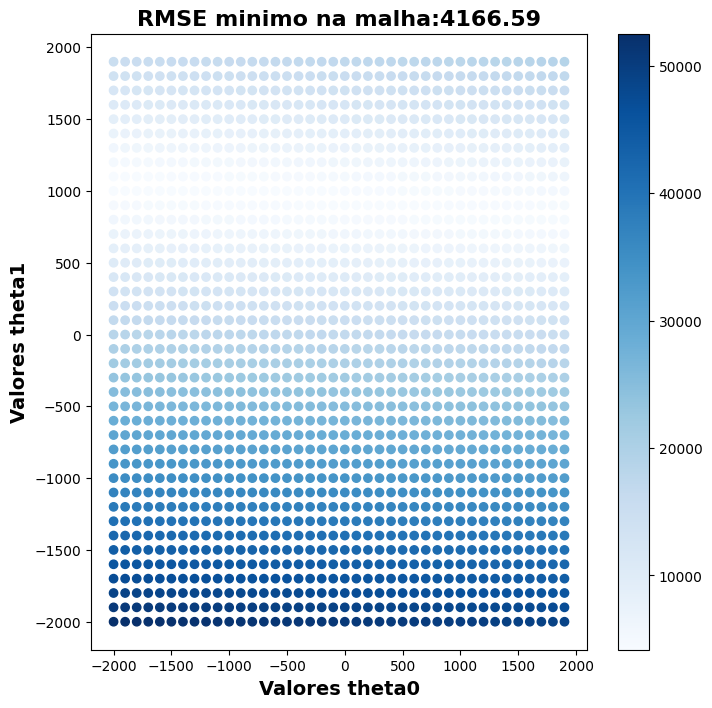

In [19]:
theta_0 = np.arange(-2000, 2000, 100)
theta_1 = np.arange(-2000, 2000, 100)

grid0, grid1, = np.meshgrid(theta_0, theta_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

X = df['Anos de Estudo']
y = df['Salário']

rmse_list = [rmse(y = y, y_pred = f_linear(x = X,theta0 = t[0], theta1 = t[1]))for t in zip(grid0, grid1)]

rmse_min = np.min(rmse_list)

plt.figure(figsize=[8, 8])
plt.title('RMSE minimo na malha:'  + str(np.round(rmse_min,2)), fontweight = 'bold', fontsize = 16)
plt.scatter(grid0, grid1 , c= rmse_list, cmap= plt.cm.Blues)
plt.xlabel('Valores theta0',fontweight = 'bold', fontsize = 14)
plt.ylabel('Valores theta1',fontweight = 'bold', fontsize = 14)
plt.colorbar()
plt.show()





In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#instanciando o algoritmo

regressor = LinearRegression()
regressor

LinearRegression()

In [22]:
type(X), type(y)

(pandas.core.series.Series, pandas.core.series.Series)

In [23]:
#Ajustando formato

X = X.values.reshape(-1,1)
type[X], X.shape

(type[array([[ 2.],
        [ 4.],
        [ 6.],
        [ 7.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [27.],
        [29.]])],
 (20, 1))

In [24]:
y = y.values.reshape(-1,1)
type[y], y.shape

(type[array([[ 1559.],
        [ 3312.],
        [ 2078.],
        [ 3758.],
        [11724.],
        [ 5128.],
        [10965.],
        [10354.],
        [12457.],
        [14621.],
        [ 6711.],
        [16826.],
        [13827.],
        [26841.],
        [25739.],
        [14385.],
        [15156.],
        [25268.],
        [24623.],
        [34995.]])],
 (20, 1))

In [26]:
#filtranso - treinando - o modelo aos dados
regressor.fit(X, y)

LinearRegression()

In [29]:
#predizendo os valores

ypred = regressor.predict(X)
ypred

array([[  -32.01522673],
       [ 2072.60877727],
       [ 4177.23278128],
       [ 5229.54478328],
       [ 7334.16878728],
       [ 8386.48078929],
       [ 9438.79279129],
       [10491.10479329],
       [11543.41679529],
       [12595.7287973 ],
       [13648.0407993 ],
       [14700.3528013 ],
       [15752.6648033 ],
       [19961.91281131],
       [21014.22481332],
       [22066.53681532],
       [23118.84881732],
       [24171.16081932],
       [26275.78482333],
       [28380.40882733]])

In [30]:
rmse( y= y,y_pred = ypred)

4146.730024229038

# Visualizando o modelo de regressão simples

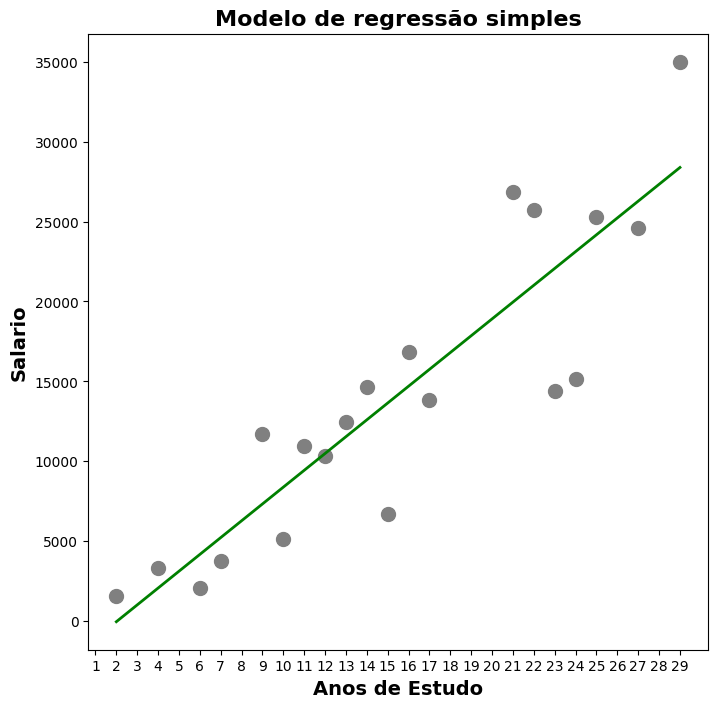

In [32]:
plt.figure(figsize=[8, 8])
plt.title('Modelo de regressão simples', fontweight = 'bold', fontsize = 16)
plt.scatter(df['Anos de Estudo'], df['Salário'], s= 100,c= 'gray')
plt.xlabel('Anos de Estudo',fontweight = 'bold', fontsize = 14)
plt.ylabel('Salario',fontweight = 'bold', fontsize = 14)
plt.xticks(range(0, 30))
plt.plot(X, ypred, c='green', lw = 2)
plt.show()





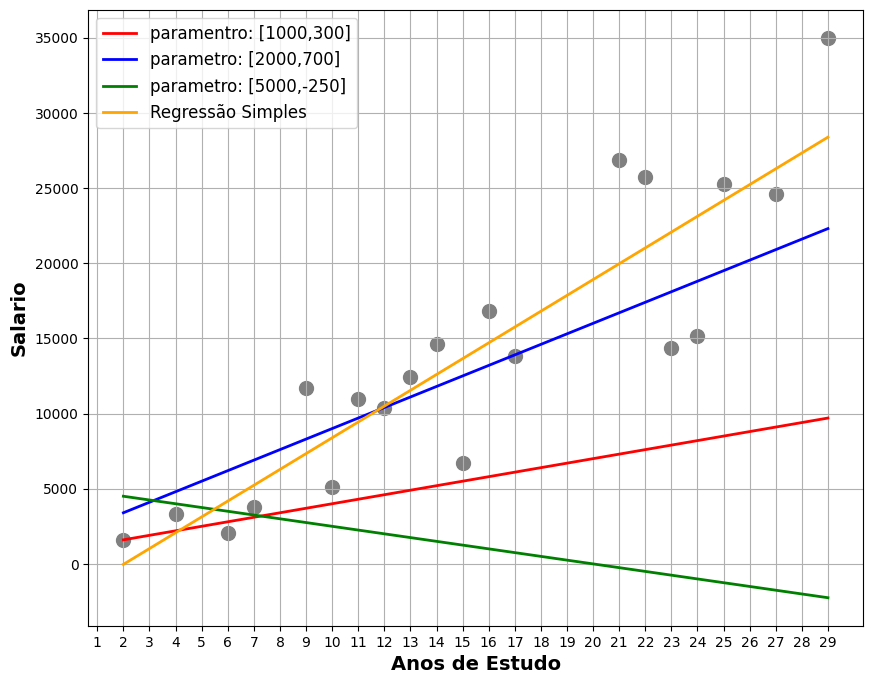

In [36]:
X = df['Anos de Estudo']
y1 = f_linear(X, theta0 = 1000, theta1 = 300)
y2 = f_linear(X, theta0 = 2000,theta1 = 700)
y3 = f_linear(X, theta0 = 5000, theta1=-250)

plt.figure(figsize=[10, 8])
plt.scatter(df['Anos de Estudo'], df['Salário'], s= 100,c= 'gray')
plt.xlabel('Anos de Estudo',fontweight = 'bold', fontsize = 14)
plt.ylabel('Salario',fontweight = 'bold', fontsize = 14)
plt.xticks(range(0, 30))
plt.grid()

plt.plot(X, y1, label = 'paramentro: [1000,300]', lw = 2, c='red')
plt.plot(X, y2, label = 'parametro: [2000,700]',lw = 2, c= 'blue')
plt.plot(X, y3, label = 'parametro: [5000,-250]',lw = 2 ,c= 'green')
plt.plot(X, ypred, c = 'orange', lw=2, label= 'Regressão Simples')
plt.legend(fontsize=12)
plt.show()











In [38]:
regressor.intercept_, regressor.coef_

(array([-2136.63923074]), array([[1052.312002]]))